# TODO
* Change into snake case.
* Add more comments

# Style

# Importing and functions

## Anaconda and jupyter basics

### Anaconda basics
See verion of Anaconda:

    conda -V

See installed packages:

    conda list

List environment:

    conda env list

Switch to new environment or go back to the base environment:

    conda activate NAMEOFENVIRONMENT
    conda create --name NAMEOFNEWENVIRONMENT --clone NAMEOFOLDENVIRONMENT
    conda deactivate

Create (with copy) or delete an environment:

    conda create --name NAMEOFENVIRONMENT
    conda remove --name NAMEOFENVIRONMENT --all

[Install a package](https://pip.pypa.io/en/stable/getting-started/) or [uninstall](https://pip.pypa.io/en/stable/cli/pip_uninstall/) (in current environment):

    pip install NAMEOFPACKAGE NAMEOFSECONDPACKAGE
    pip uninstall NAMEOFPACKAGE
    pip cache purge

Update a package, view the current version/check if installed or install a specific version:

    pip install NAMEOFPACKAGE --upgrade
    pip show NAMEOFPACKAGE
    pip install NAMEOFPACKAGE==1.3.4

### Jupyter basics
Jupyter can use [Markdown](https://www.markdownguide.org/basic-syntax/). Which is usefull to know.


You can directly run commands from the code by putting an exclamation mark in front of it:

In [1]:
!pip install pandas

Reset your variables

In [2]:
%reset -f

## Importing (standard) modules

In [3]:
# Data/vector handeling and extra math
import numpy as np
import pandas as pd
import math

# Optimisation
import scipy
from scipy import optimize
import sklearn.metrics as metrics

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Error handeling
import warnings

# Time
import time
import datetime

# System/file interaction
import os
import pickle# https://www.pythoncentral.io/how-to-pickle-unpickle-tutorial/
import shelve# https://stackoverflow.com/questions/2960864/how-to-save-all-the-variables-in-the-current-python-session

## Importing from file

In [4]:
from helpers import *
from exampleHelpers import *

## Defining (lambda) functions

In [5]:
exampleRealFunction = lambda x: np.exp(x)/10 + x**2 + np.sqrt(x)# https://realpython.com/python-lambda/

def thirdOrderPolynomial(x, a: float, b: float, c=2, d=1):
    """
    A third order polynomial function.
    
    This is the function that is going to be fitted with the data.
    """
    first_part = a + b*x
    second_part = c*x**2 + d*x**3
    return first_part + second_part

# Example of data importing, fitting, filtering and plotting

## (Online) data importing, subplots and figure display/saving

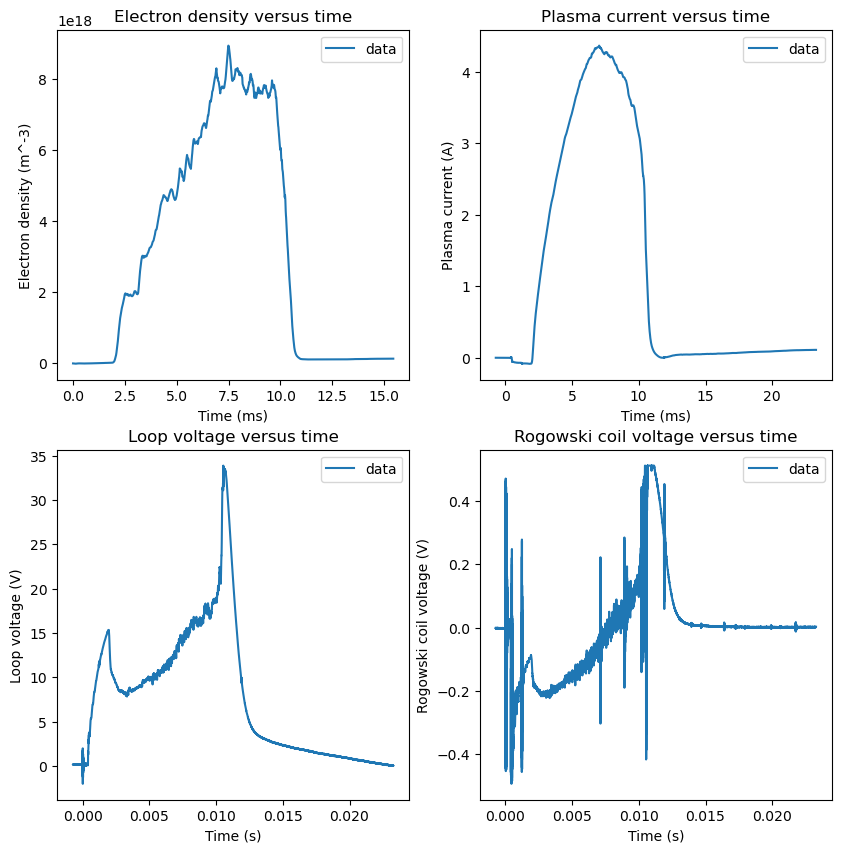

In [6]:
### From file via numpy.
"""
data = np.genfromtxt(filename, skip_header=2, delimiter =  ",")
x = data[:,0]
y = data[:,1]#"""

### From file via pandas
"""
data = pd.read_csv("Spectrum.txt", delimiter="\t")
print(data.describe(), data.columns)
x = data[data.columns[0]]
y = data["Intensity"]#"""

### From internet pandas
shot_no = 41299
"""import requests
t_CD = requests.get('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Production/Parameters/Tcd')# Time curren drive
t_CD = float(t_CD.content) * 1e-6  # from us to s"""

ne_lav = pd.read_csv('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Diagnostics/Interferometry/LukLob/ne_lav.csv', header=None)
Ip = pd.read_csv('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Diagnostics/BasicDiagnostics/Basic/Results/Ip.csv', header=None)
U_Loop = pd.read_csv('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Diagnostics/BasicDiagnostics/DetectPlasma/U_Loop.csv', header=None)
U_RogCoil = pd.read_csv('http://golem.fjfi.cvut.cz/shots/'+str(shot_no)+'/Diagnostics/BasicDiagnostics/DetectPlasma/U_RogCoil.csv', header=None)

## Plotting data
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize = (10,10))# Make an plot with multiple subfigures

ax1.plot(ne_lav[0], ne_lav[1], label="data")
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Electron density (m^-3)")
ax1.set_title("Electron density versus time")
ax1.legend()

ax2.plot(Ip[0], Ip[1], label="data")
ax2.set_xlabel("Time (ms)")
ax2.set_ylabel("Plasma current (A)")
ax2.set_title("Plasma current versus time")
ax2.legend()

ax3.plot(U_Loop[0], U_Loop[1], label="data")
ax3.set_xlabel("Time (s)")
ax3.set_ylabel("Loop voltage (V)")
ax3.set_title("Loop voltage versus time")
ax3.legend()

ax4.plot(U_RogCoil[0], U_RogCoil[1], label="data")
ax4.set_xlabel("Time (s)")
ax4.set_ylabel("Rogowski coil voltage (V)")
ax4.set_title("Rogowski coil voltage versus time")
ax4.legend()

plt.show()

## Saving and deleting

In [7]:
## Figure
fig.savefig('ExampleSubfigures.pdf', dpi=1200)# resolution = figsize*dpi#, format='eps'

## Pickle a single variable
if not os.path.isdir("temp"):
    os.makedirs("temp")

with open("temp/pickle_file.pickle", "wb") as file:
    pickle.dump(Ip, file)

with open("temp/pickle_file.pickle", "rb") as file:
    Ip = pickle.load(file)
#print(IpFromPickle)

## Shelving
myShelve = shelve.open("temp/shelve_file", "n")
for key in dir():
    try:
        myShelve[key] = globals()[key]
    except:
        # Doesn't save everything, but most variables are saved.
        print('ERROR shelving: {0}'.format(key))
myShelve.close()

my_shelf = shelve.open("temp/shelve_file")
for key in my_shelf:
    try:
        globals()[key]=my_shelf[key]
    except:
        print('(Limited) ERROR unshelving: {0}'.format(key))
my_shelf.close()

## Deleting files
os.remove('ExampleSubfigures.pdf')
os.remove("temp/pickle_file.pickle")
os.remove("temp/shelve_file.bak")
os.remove("temp/shelve_file.dat")
os.remove("temp/shelve_file.dir")
os.rmdir("temp")

ERROR shelving: __builtin__
ERROR shelving: __builtins__
ERROR shelving: datetime
ERROR shelving: exampleRealFunction
ERROR shelving: exit
ERROR shelving: file
ERROR shelving: get_ipython
ERROR shelving: math
ERROR shelving: metrics
ERROR shelving: nn
ERROR shelving: np
ERROR shelving: open
ERROR shelving: optim
ERROR shelving: optimize
ERROR shelving: os
ERROR shelving: pd
ERROR shelving: pickle
ERROR shelving: plt
ERROR shelving: quit
ERROR shelving: scipy
ERROR shelving: shelve
ERROR shelving: sns
ERROR shelving: time
ERROR shelving: torch
ERROR shelving: warnings


## Example polynomial fitting and random data generation

Selected order: order 9 of 20 , MAPE: 9.511295165328406 , minimum MAPE: 9.458372720494566
Coefficients: [ 1.66475419e+00 -1.13086024e+01  3.80131158e+01 -4.45952453e+01
  2.68723142e+01 -8.90702136e+00  1.69327773e+00 -1.82432423e-01
  1.02724429e-02 -2.30406742e-04]


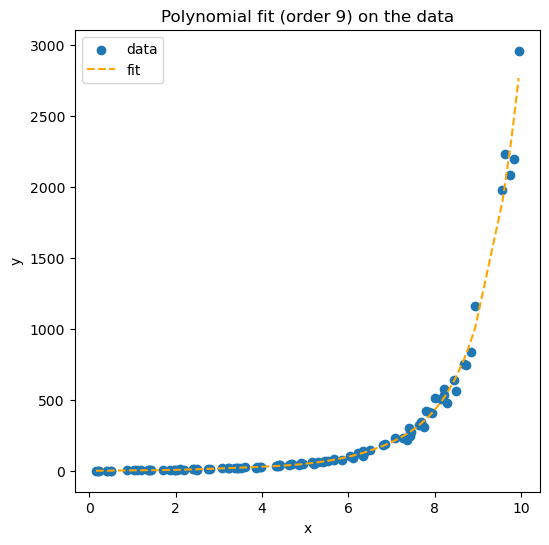

Selected order: order 4 of 4 , MAPE: 46.16947794754985 , minimum MAPE: 46.16947794754985
Coefficients: [-0.03291029  0.60351372  0.05934946 -0.04206211 -0.00482237]


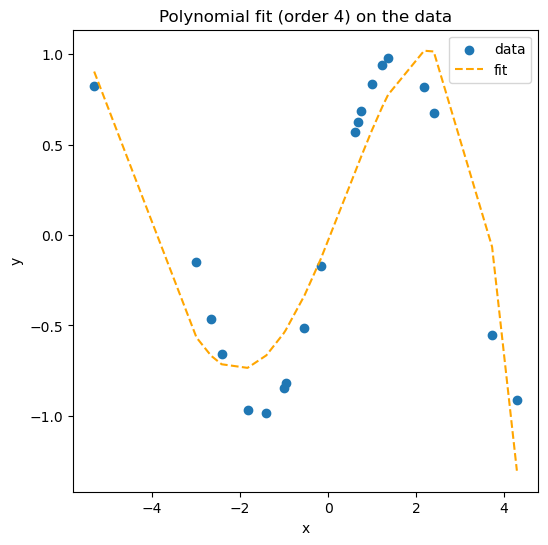

In [8]:
variation = 0.2

## Constantly space stuff.
#x = np.linspace(1, 10, num=100+1)#, endpoint=False)# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
#x = np.logspace(2, 10, num=8+1)# https://numpy.org/doc/stable/reference/generated/numpy.logspace.html

# Randomly spaced stuff.
x = np.sort((10 * np.random.rand(100)))# 100 random points between 0 and 10
#x = np.sort(np.random.randint(0, 10, size=100))# 100 random intergers between 0 and 10.
y = exampleRealFunction(x) * ((2*np.random.rand(len(x))*variation + 1))# Add random variation to y data guaranteed to be in a certain range.

coefficients, MAPE = makePolynomialFit(x, y, True)

x = np.sort(np.random.normal(loc=0, scale=2, size=20))#20 random points of a Gaussian distribution with a mean of 0 and std of 2.
y = np.sin(x)
coefficients, MAPE = makePolynomialFit(x, y, True)

## Fitting/filtering, scatter/line plot, finding a specific data point/index and metrics

Theoretical minimum MAPE: 10.381913749719454
Fit parameters: [-3.43545994  6.71947374 -1.82446605  0.45574576] with standard deviation [2.34411909 2.76386446 0.98740183 0.10901679]
RMSE =  2.2911660689680073 , MAPE = 10.367760944390893 , MAE = 1.6140681751141273 , MSE = 5.249441955590311 , R2 = 0.9583778374661199


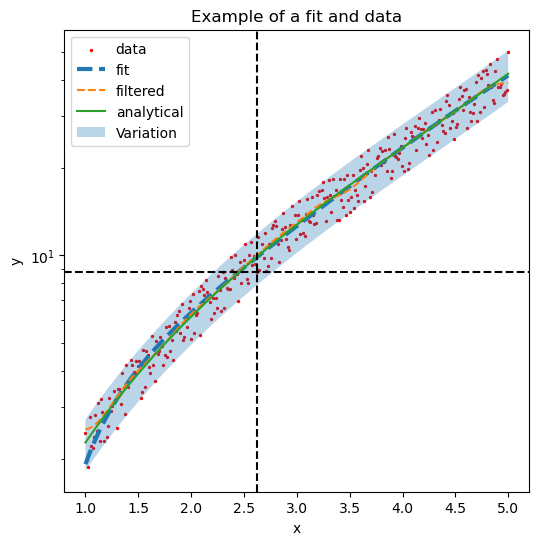

In [9]:
## Generating/getting data
### From function
amountOfDatapoints = 300
variation = 0.2

x = np.linspace(1, 5, num=amountOfDatapoints)
y = exampleRealFunction(x) * ((2 * np.random.rand(amountOfDatapoints) - 1) * variation + 1)# Add random variation to y data
print("Theoretical minimum MAPE:", 100*metrics.mean_absolute_percentage_error(y, exampleRealFunction(x)))

## Fitting data
startingParameters = [-10, 15, -5, 1]# Optional starting values of the parameters
popt, pcov = optimize.curve_fit(thirdOrderPolynomial, x, y, startingParameters)# Make the fit.

fit = thirdOrderPolynomial(x, *popt)# Get the results of the fit.
print("Fit parameters:", popt, "with standard deviation", np.sqrt(np.diag(pcov)))
print("RMSE = ", metrics.mean_squared_error(y, fit, squared=False), ", MAPE =", 100*metrics.mean_absolute_percentage_error(y, fit), ", MAE =", metrics.mean_absolute_error(y, fit), ", MSE =", metrics.mean_squared_error(y, fit), ", R2 =", metrics.r2_score(y, fit))#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

## Filtering data
y_filter = scipy.ndimage.gaussian_filter(y, 10)# Apply a Gaussian filter (like time averaging) to smooth the curve.

x_interpolation = np.linspace(1, 5, num=5*amountOfDatapoints)
y_interpolation = np.interp(x_interpolation, x, y_filter)

## Get the index of where y=10
y_goal = 10
index = (np.abs(y_filter - y_goal)).argmin()

## Ploting data
fig, ax = plt.subplots(1, 1, figsize = (6,6))# Make a plot.
ax.scatter(x, y, label="data", s=2, marker="o", color='r')
ax.plot(x, fit, linewidth=3, linestyle="--", label="fit")
ax.plot(x, y_filter, linestyle="--", label="filtered")
ax.plot(x, exampleRealFunction(x), label="analytical")
ax.fill_between(x, exampleRealFunction(x)*(1+variation), exampleRealFunction(x)*(1-variation), alpha=0.3, label="Variation")
ax.axvline(x[index], color="k", linestyle="--")
ax.axhline(y[index], color="k", linestyle="--")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_yscale('log')
ax.set_title("Example of a fit and data")
ax.legend()
plt.show()

## Heatmap and contour plot example


[Seaborn only first row](https://stackoverflow.com/questions/77165100/only-the-first-row-of-annotations-displayed-on-seaborn-heatmap): pip install seaborn --upgrade



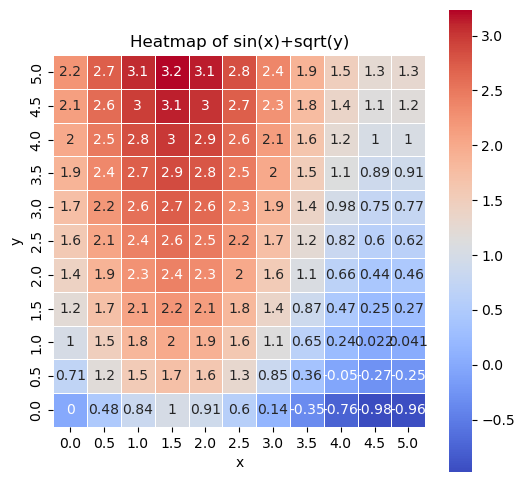

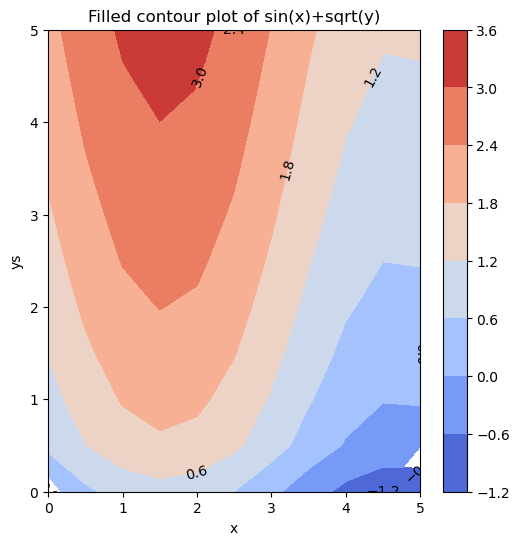

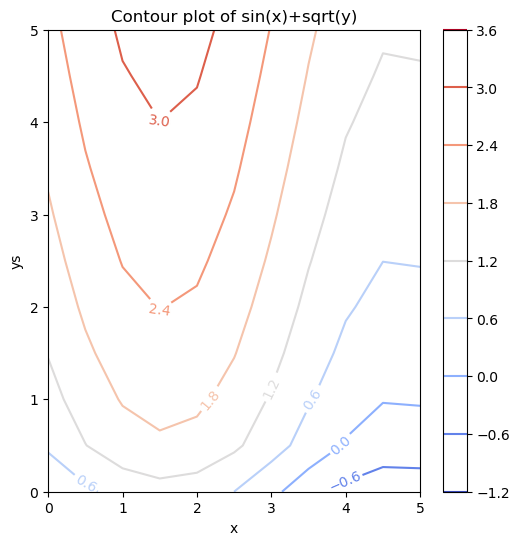

In [10]:
x = []
y = []
z = []

for i in np.linspace(0, 5, num=11):
    for j in np.linspace(0, 5, num=11):
        x.append(i)
        y.append(j)
        z.append(np.sin(i)+np.sqrt(j))

## Plotting
xGrid, yGrid, zGrid, pdDataframe = transformToGrid(x, y, z, xName="x", yName="y", zName="sin(x)+sqrt(y)")
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
sns.heatmap(pdDataframe, ax=ax, cmap="coolwarm", linewidths=.5, annot=True, square=True)
ax.invert_yaxis()
#ax.xaxis.tick_top()
ax.set_title("Heatmap of sin(x)+sqrt(y)")
plt.show()

xGrid, yGrid, zGrid, pdDataframe = transformToGrid(x, y, z, xName="x", yName="y", zName="sin(x)+sqrt(y)")
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
CS = ax.contourf(xGrid, yGrid, zGrid, cmap="coolwarm")#, levels=13)
ax.clabel(CS, fontsize=10, colors=['black' for l in CS.levels])
ax.set_title("Filled contour plot of sin(x)+sqrt(y)")
ax.set_xlabel("x")
ax.set_ylabel("ys")
fig.colorbar(CS)
plt.show()

xGrid, yGrid, zGrid, pdDataframe = transformToGrid(x, y, z, xName="x", yName="y", zName="sin(x)+sqrt(y)")
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
CS = ax.contour(xGrid, yGrid, zGrid, cmap="coolwarm")#, levels=13)
ax.clabel(CS, fontsize=10)
ax.set_title("Contour plot of sin(x)+sqrt(y)")
ax.set_xlabel("x")
ax.set_ylabel("ys")
fig.colorbar(CS)
plt.show()

# Machine learning

## Neural Network

Water speed in a great example for complex behavoir to fit with neural networks.

There are two (main) ways to do a neural network. With (py)torch or with Tensorflow/Keras.

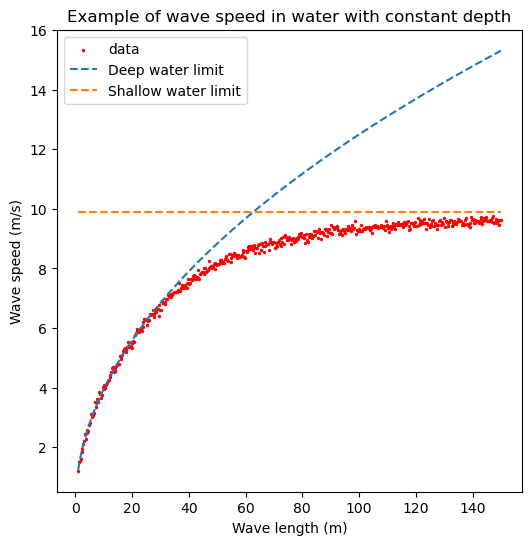

In [11]:
N = 500
noise = 0.1
g = 9.81
d = 10
wave_physics = lambda x: np.sqrt(g*x/(2*np.pi)*np.tanh(2*np.pi*d/x))#https://en.wikipedia.org/wiki/Wind_wave#Physics_of_waves
x = np.linspace(1, 150, num=N)
y = wave_physics(x) + noise*np.random.normal(loc=0, scale=0.9, size=x.shape)

fig, ax = plt.subplots(1, 1, figsize = (6,6))# Make a plot.
ax.scatter(x, y, label="data", s=2, marker="o", color='r')
#ax.axvline(2*d, color="k", linestyle="--")
ax.plot(x, np.sqrt(g*x/(2*np.pi)), linestyle="--", label="Deep water limit")
ax.plot(x, np.sqrt(g*d)*x/x, linestyle="--", label="Shallow water limit")
ax.set_xlabel("Wave length (m)")
ax.set_ylabel("Wave speed (m/s)")
ax.set_title("Example of wave speed in water with constant depth")
ax.legend()

### Keras

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

    pip install tensorflow

You can run it on your GPU (see AP2P4 subject), NOTE: this only works with [older](https://stackoverflow.com/questions/51306862/how-do-i-use-tensorflow-gpu) versions of [tensorflow](https://www.tensorflow.org/install/pip#windows-native):

    conda install tensorflow-gpu
    conda install keras

Another solution is using the [torch backend](https://keras.io/getting_started/#installing-keras-3). Note I have not been able to verify that this works.

    import os
    os.environ["KERAS_BACKEND"] = "torch"# Run it as on torch instead of tensor flow, which has GPU support.
    import keras

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Tensorflow on GPU: False , On Cuda: False
Epoch 1/1500


C:\Users\heisz\anaconda3\envs\ML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 47.7017 - val_loss: 9.1199
Epoch 2/1500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.1912 - val_loss: 7.9651
Epoch 3/1500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5904 - val_loss: 7.8453
Epoch 4/1500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2042 - val_loss: 7.6846
Epoch 5/1500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1359 - val_loss: 7.6811
Epoch 6/1500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4756 - val_loss: 7.4681
Epoch 7/1500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0484 - val_loss: 7.3440
Epoch 8/1500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9187 - val_loss: 7.2165
Epoch 9/1500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3220 - val_loss: 7.2473
Epoch 10/1500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9997 - val_loss: 6.9887
Epoch 11/1500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9030 - val_loss: 6.8315
Epoch 12/1500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.4

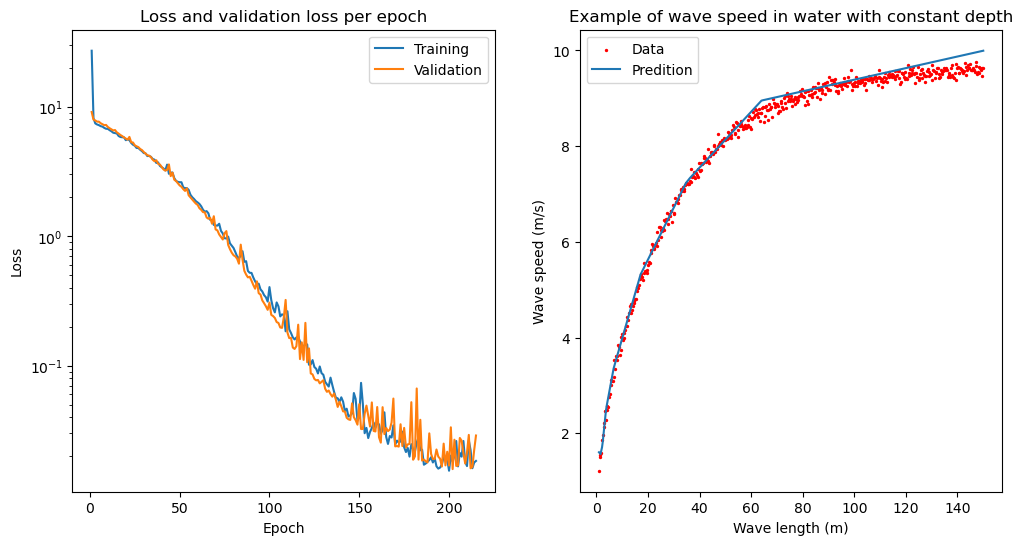

In [12]:
import tensorflow as tf
import os
#os.environ["KERAS_BACKEND"] = "torch"# Run it as on torch instead of tensor flow, which has GPU support. 2ms
import keras
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D, AveragePooling2D
from keras.optimizers import SGD, Adam, Adagrad, RMSprop# https://keras.io/api/optimizers/
from keras.losses import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.model_selection import train_test_split

print("Tensorflow on GPU:",tf.test.is_gpu_available(), ", On Cuda:",tf.test.is_gpu_available(cuda_only=True))

# Transform the data
x_data = np.array([[i] for i in x])
y_data = np.array([[i] for i in y])# When having multiple inputs/outputs add more within each list.

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)# Split of 30% to use for testing, the keras model already splits of a part for validation.

# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(1,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
callbacks = [keras.callbacks.EarlyStopping(monitor='loss', patience=15)]#https://keras.io/api/callbacks/early_stopping/
model.compile(loss=mean_squared_error, optimizer=optimizer)#Can also easily define your own loss function.

# Fit the keras model and evaluate
history = model.fit(x_train, y_train, epochs=1500, batch_size=10, validation_split=0.3, verbose=1, callbacks=callbacks)
training_loss = history.history["loss"]#print(history.history.keys())
validation_loss = history.history["val_loss"]

test_loss = model.evaluate(x_test, y_test, verbose=0)
print("Model has a test loss of:", test_loss)

# Make predictions and plot
predictions = model.predict(x_data, verbose=0)

fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (12,6))# Make a plot.
ax1.plot(range(1, len(training_loss)+1), training_loss, label="Training")
ax1.plot(range(1, len(validation_loss)+1), validation_loss, label="Validation")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_yscale('log')
ax1.set_title("Loss and validation loss per epoch")
ax1.legend()

ax2.scatter(x, y, label="Data", s=2, marker="o", color='r')
ax2.plot(x, predictions, label="Predition")
ax2.set_xlabel("Wave length (m)")
ax2.set_ylabel("Wave speed (m/s)")
ax2.set_title("Example of wave speed in water with constant depth")
ax2.legend()

### Torch

    pip install torch

it is not recommended to use Torch since it is much more manual.

You can install/run it on your GPU: https://pytorch.org/get-started/locally/

https://machinelearningmastery.com/develop-your-first-neural-network-with-pytorch-step-by-step/

    pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Using cuda device
Progress: [##################################################] 100.0% | 9.31 %/sec | 0.0 sec remaining | Epoch: 500, Loss: 0.025922495871782303, Validation loss: 0.031068501994013786                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
Model has a test loss of: 0.02239309437572956


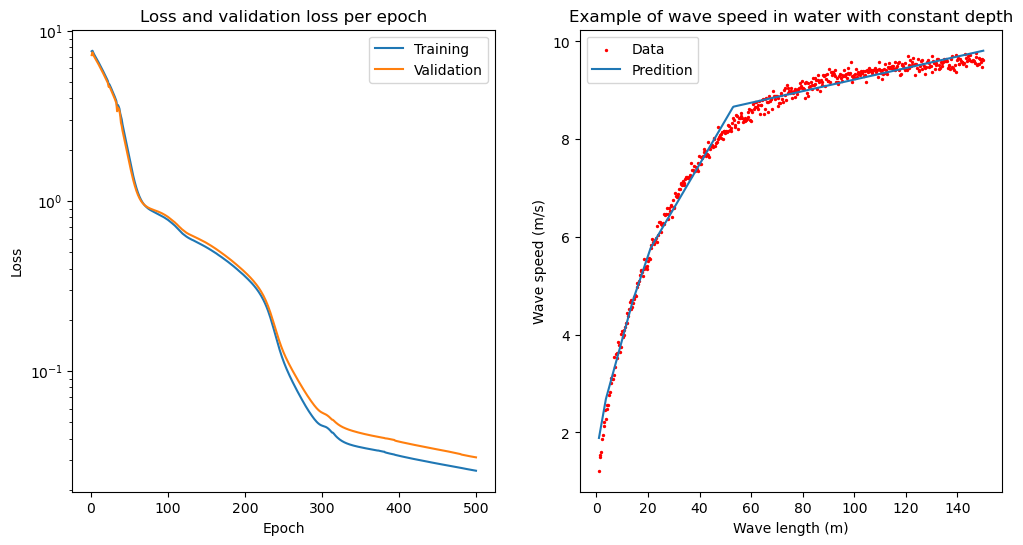

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

### Preparing data
x_data = torch.tensor(x, dtype=torch.float32).unsqueeze(-1)#np.array([[i] for i in x])
y_data = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)#np.array([[i] for i in y])# When having multiple inputs/outputs add more within each list.

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)# Split of 30% to use for testing, the next line splits the validation part.

model = nn.Sequential(nn.Linear(1, 12), nn.ReLU(), nn.Linear(12, 8), nn.ReLU(), nn.Linear(8, 1))

### Preparing fit and doing fit
loss_function = nn.MSELoss()#https://neptune.ai/blog/pytorch-loss-functions
optimizer = optim.Adam(model.parameters(), lr=0.001)

history = train_neural_net_torch(model, x_train, y_train, epochs=500, validation_fraction=0.3, batch_size=10, loss_function=loss_function, optimizer=optimizer, verbose=1)# This is a self-written function

### Testing and evaluating the model
y_predict = model(x_test)
test_loss = loss_function(y_predict, y_test).item()
print("Model has a test loss of:", test_loss)

predictions = model(x_data).detach().numpy()

fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (12,6))# Make a plot.
ax1.plot(history["epoch"], history["loss"], label="Training")
ax1.plot(history["epoch"], history["val_loss"], label="Validation")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_yscale('log')
ax1.set_title("Loss and validation loss per epoch")
ax1.legend()

ax2.scatter(x, y, label="Data", s=2, marker="o", color='r')
ax2.plot(x, predictions, label="Predition")
ax2.set_xlabel("Wave length (m)")
ax2.set_ylabel("Wave speed (m/s)")
ax2.set_title("Example of wave speed in water with constant depth")
ax2.legend()

## Guassian procces

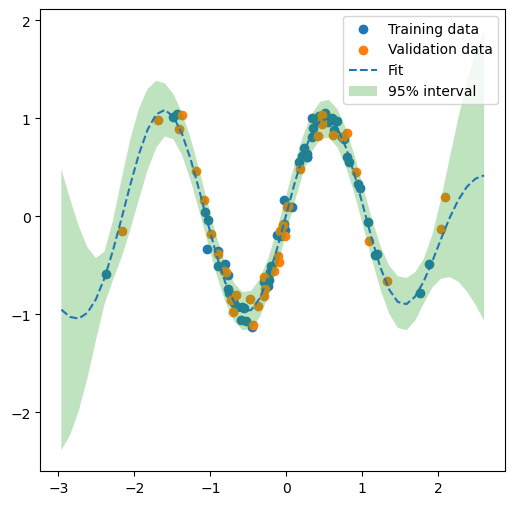

Training error: {'RMSE': 0.08571095851677861, 'MAPE': 19.769932921270204, 'MAE': 0.06538055281504727, 'MSE': 0.007346368409864943, 'R2': 0.9856345206752491}
Validation error: {'RMSE': 0.11256567962216699, 'MAPE': 24.900569158714674, 'MAE': 0.0901980878868898, 'MSE': 0.012671032228800339, 'R2': 0.971878500036103}


In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor# https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, PairwiseKernel, WhiteKernel
from sklearn.model_selection import train_test_split

N = 100
noise = 0.1
sin3 = lambda x: np.sin(3*x)
x = np.random.normal(loc=0, scale=0.8, size=N)
y = sin3(x) + noise*np.random.normal(loc=0, scale=0.9, size=x.shape)


ker = RBF(length_scale=1) + WhiteKernel(noise_level=1.0)#, Matern, RationalQuadratic, ExpSineSquared
regressor, training_error, validation_error = make_Gaussian_proccess_model(x, y, kernel=ker, validation_fraction=0.4, make_plot=True)

#ker = ExpSineSquared(length_scale=1) + WhiteKernel(noise_level=1.0)
#regressor, training_error, validation_error = make_Gaussian_proccess_model(x, y, kernel=ker, validation_fraction=0.75, make_plot=True)

#ker = ExpSineSquared() + RBF() + WhiteKernel()
#regressor, training_error, validation_error = make_Gaussian_proccess_model(x, y, kernel=ker, validation_fraction=0.75, make_plot=True)


# Performance and updates

## Progress bar

In [15]:
startTime = time.time()
last_update = 0# This zero is needed to ensure the first update works.

for i in range(0,1001,5):
    random_function(i/5000)
    last_update = update_progress(i/1000, bar_length=50, start_time=startTime, message="The time prediction is not accurate due to non-linear time-scaling", last_update_time=last_update, refresh_rate=1/3)

endTime = time.time()
print("Simulation took:", endTime-startTime,"seconds.")

Progress: [##################################################] 100.0% | 4.96 %/sec | 0.0 sec remaining | The time prediction is not accurate due to non-linear time-scaling                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
Simulation took: 20.180216312408447 seconds.


In [16]:
startTime = time.time()
determined_pi = calculate_pi_monte_carlo(3*10**6, progress=True)
endTime = time.time()

print(determined_pi)
print("Simulation took:", endTime-startTime,"seconds.")

Progress: [##################################################] 100.0% | 13.56 %/sec | 0.0 sec remaining | Current pi: [3.142884285705238, 3000000]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
3.142884285705238
Simulation took: 7.409484624862671 seconds.


In [17]:
%timeit random_function(s = math.floor(np.pi*10**5))

The slowest run took 6.60 times longer than the fastest. This could mean that an intermediate result is being cached.
2.01 s ± 1.04 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%prun calculate_pi_monte_carlo(10**6)

         8 function calls in 1.238 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    1.225    1.225    1.237    1.237 exampleHelpers.py:46(calculate_pi_monte_carlo)
        2    0.012    0.006    0.012    0.006 {method 'rand' of 'numpy.random.mtrand.RandomState' objects}
        1    0.001    0.001    1.238    1.238 <string>:1(<module>)
        1    0.000    0.000    1.238    1.238 {built-in method builtins.exec}
        2    0.000    0.000    0.000    0.000 {built-in method time.time}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

## Multi processing/threading

https://medium.com/@grvsinghal/speed-up-your-python-code-using-multiprocessing-on-windows-and-jupyter-or-ipython-2714b49d6fac

When using Jupyter only pool works (with the certain fix). In that case the method that is being excecuted needs to be imported from a seperate file (and can't be defined in the Jupyter file itself).

https://www.pythontutorial.net/python-concurrency/python-multiprocessing/

https://superfastpython.com/multiprocessing-in-python/#Tip_5_Use_Pipes_and_Queues

Using processes:

In [19]:
# Dit werkt allemaal niet helemaal lekker binnen Jupyter. Gebruik in plaats daarvan pooling
"""
from multiprocessing import Process, Queue

def calculate_pi_monte_carlo_queue(queue, samples, progress=False):
    #From a procces you can return a variable using a que. So you need to make a new function where the retun is put into the queue
    queue.put(calculate_pi_monte_carlo(samples, progress))


samples_number = [10**i for i in range(1,8)]

processes = []
queue = Queue()
for i in samples_number:
    processes.append(Process(target=calculate_pi_monte_carlo_queue, args=(queue, i, True)))

print("Created all the processes.")

for process in processes:
    process.start()
    
print("Started all the processes.")

#for process in processes:
#    process.join()

print("Finished all the processes.")

results = []
for i in range(len(processes)):
    results.append(queue.get())
    print(results)
    # This could also be transformed into a pd dataframe using pd.concat(results, , ignore_index = True, sort = False))

print("Got results from all the processes.")

print()
print(sample_number)
print(results)
"""

'\nfrom multiprocessing import Process, Queue\n\ndef calculate_pi_monte_carlo_queue(queue, samples, progress=False):\n    #From a procces you can return a variable using a que. So you need to make a new function where the retun is put into the queue\n    queue.put(calculate_pi_monte_carlo(samples, progress))\n\n\nsamples_number = [10**i for i in range(1,8)]\n\nprocesses = []\nqueue = Queue()\nfor i in samples_number:\n    processes.append(Process(target=calculate_pi_monte_carlo_queue, args=(queue, i, True)))\n\nprint("Created all the processes.")\n\nfor process in processes:\n    process.start()\n    \nprint("Started all the processes.")\n\n#for process in processes:\n#    process.join()\n\nprint("Finished all the processes.")\n\nresults = []\nfor i in range(len(processes)):\n    results.append(queue.get())\n    print(results)\n    # This could also be transformed into a pd dataframe using pd.concat(results, , ignore_index = True, sort = False))\n\nprint("Got results from all the proce

Using pools:

pool.map is a way to do it for functions which have a single input.

In [20]:
from multiprocessing import Pool

samples_number = [10**i for i in range(1,8)]
start_time = time.time()

if __name__ ==  '__main__':
    __spec__ = "ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>)"# Only needed for Jupyter https://stackoverflow.com/questions/45720153/python-multiprocessing-error-attributeerror-module-main-has-no-attribute

    with Pool() as pool:
        results = pool.map(calculate_pi_monte_carlo, samples_number)# For single inputs
    
print("Input:", samples_number)
print("Output:", results)
print("Computation time:", time.time()-start_time)

Input: [10, 100, 1000, 10000, 100000, 1000000, 10000000]
Output: [2.909090909090909, 3.00990099009901, 3.196803196803197, 3.154884511548845, 3.1430085699143007, 3.1395408604591397, 3.1408632859136714]
Computation time: 15.937079668045044


pool.starmap is a way to give functions multiple inputs.

In [21]:
from multiprocessing import Pool

samples_number = np.random.randint(1, 20, size=10)
input = [(i, i) for i in samples_number]# Create an list of inputs.
start_time = time.time()

if __name__ ==  '__main__':
    __spec__ = "ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>)"# Only needed for Jupyter https://stackoverflow.com/questions/45720153/python-multiprocessing-error-attributeerror-module-main-has-no-attribute

    with Pool() as pool:
        results = pool.starmap(random_function, input)# https://superfastpython.com/multiprocessing-pool-map-multiple-arguments/

print("Input:", samples_number)
print("Output:", results)
print("Expected computation time:", np.sum(samples_number), "Real achieved computation time:", time.time()-start_time, "Minimum possible time:", max(samples_number))

Input: [12 10 12  4 18  9 17  2  1 19]
Output: [24, 20, 24, 8, 36, 18, 34, 4, 2, 38]
Expected computation time: 104 Real achieved computation time: 24.360840797424316 Minimum possible time: 19
